<a href="https://colab.research.google.com/github/AliAramideh/Classification_drug/blob/main/Classification_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

# Classification

## Import needed packages

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, f1_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

## Underestanding the Dataset

### Load the data

In [47]:
url = 'https://github.com/AliAramideh/Classification_drug/raw/main/drug200.csv'
dataset = pd.read_csv(url)
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [48]:
dataset.shape

(200, 6)

### About the dataset

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

### Data Exploration

In [49]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Data Visualization and Analysis


 Let’s see how many of each class is in our data set

In [50]:
dataset['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Diagrams

You can easily explore your data using visualization techniques:


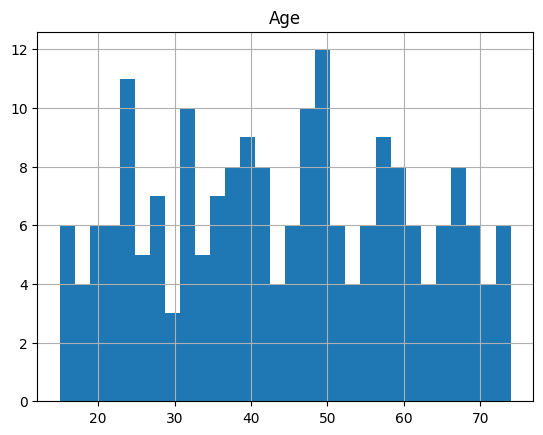

In [51]:
dataset.hist(column= 'Age', bins= 30)
plt.show()

### Feature set

In [52]:
X = dataset.drop(columns= ['Drug'])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [53]:
y = dataset['Drug']
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [60]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 5)
y shape:  (200,)


As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [54]:
# from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X['Sex'] = le_sex.transform(X['Sex'])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X['BP'] = le_BP.transform(X['BP'])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X['Cholesterol'] = le_Chol.transform(X['Cholesterol'])

X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for real world problems.


In [55]:
# from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=4)

print('Train Set:', train_X.shape, train_y.shape)
print('Test Set: ', test_X.shape, test_y.shape)

Train Set: (160, 5) (160,)
Test Set:  (40, 5) (40,)


## Decision Tree

### Modeling

In [57]:
# from sklearn.tree import DecisionTreeClassifier

model_decission_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)
model_decission_tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

We can use the model to make predictions on the test set:

In [58]:
pred_y_decision_tree = model_decission_tree.predict(test_X)
print(pred_y_decision_tree[0:5])
print(test_y[0:5].values)

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


This result is so greate!

### Evaluation

In [76]:
# from sklearn.metrics import accuracy_score
accuracy_score_decision_tree = accuracy_score(test_y, pred_y_decision_tree)
print("DecisionTrees's Accuracy: ", accuracy_score_decision_tree)

DecisionTrees's Accuracy:  0.95


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Logistic Regression

### Modeling

In [62]:
# from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(C=0.1, solver='newton-cg')
model_log_reg.fit(train_X, train_y)

LogisticRegression(C=0.1, solver='newton-cg')

### Predicting

In [64]:
pred_y_log_reg = model_log_reg.predict(test_X)
print(pred_y_log_reg[0:5])
print(test_y[0:5].values)

['drugY' 'drugY' 'drugY' 'drugY' 'drugX']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


### Evaluation

In [65]:
# from sklearn.metrics import accuracy_score

accuracy_score_log_reg = accuracy_score(test_y, pred_y_log_reg)
print('Accuracy Score: ', accuracy_score_log_reg)

Accuracy Score:  0.825


## K-nearest neighbor(KNN)

### Modeling, predicting and Evaluation

In [74]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

ks = 15
acc = []

for k in range(1, ks+1):

  # Modeling
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(train_X, train_y)

  # Predicting
  pred_y_knn = model_knn.predict(test_X)

  # Evaluation
  acc.append(accuracy_score(test_y, pred_y_knn))

acc = np.array(acc)
accuracy_score_knn = acc.max()
the_best_k = acc.argmax()+1
print(acc)
print('##---------------------------------------------------------------------')
print('The best number of k is:', the_best_k,
      'with accuracy score', accuracy_score_knn)

[0.7   0.725 0.7   0.65  0.65  0.65  0.6   0.65  0.625 0.6   0.575 0.6
 0.575 0.575 0.575]
##---------------------------------------------------------------------
The best number of k is: 2 with accuracy score 0.725


## Comparing

In [78]:
accuracy = {'AccuracyScore': [accuracy_score_decision_tree,
                               accuracy_score_log_reg,
                               accuracy_score_knn]}
index = ['DecisionTree', 'LogReg', 'KNN']
compare_df = pd.DataFrame(data=accuracy, index=index)
compare_df

,AccuracyScore
DecisionTree,0.950
LogReg,0.825
KNN,0.725


In [79]:
compare_df.loc[compare_df.idxmax()]

,AccuracyScore
DecisionTree,0.95


As you see, the best method to classification is decision tree
for this dataset